# Utilisation de PCA et K-means pour le clustering

- Ceci est un exemple de la façon dont vous pourriez traiter des données multidimensionnelles. En tant que cas d'utilisation, on va essayer de regrouper différents types de vin dans une méthode non supervisée.

- Commençons par importer quelques packages. J'utiliserai les méthodes PCA de sklearn (réduction de dimension), les méthodes K-mean (regroupement des points de données) et l'un de leurs ensembles de données intégrés (pour plus de commodité). on utiliseront également l'objet dataframe de pandas pour stocker notre jeu de données et matplotlib pour les visualisations

In [1]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.datasets import load_wine # Dataset that I will be using
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently

- Pour les besoins de cet exemple, on utiliseront l'ensemble de données intégré de vins de sci-kit learn, chargeons donc ces données dans une base de données. On vous encouragent à essayer votre propre jeu de données .

In [3]:
wines = load_wine()
wine_df = pd.DataFrame(wines.data, columns=wines.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


- Nous pouvons voir que chaque vin (ligne) est décrit avec 13 caractéristiques, y compris le pourcentage d'alcool, l'alcalinité, etc. Nous pouvons faire quelques astuces supplémentaires avec les pandas pour obtenir un aperçu général de l'ensemble de données.

In [4]:
wine_df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- Maintenant, on aimeront pouvoir visualiser chaque point dans un espace à 13 dimensions, mais on ne peuvent tout simplement pas. Nous devons donc trouver un moyen de réduire la dimensionnalité de nos données.

La chose naïve à faire serait de vérifier la corrélation de certaines fonctionnalités et d'espérer que certaines d'entre elles sont des répétitions (peuvent être supprimées). Essayons-le et affichons la matrice de corrélation.

In [5]:
correlation = wine_df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


La corrélation entre les flavonoïdes et les total_phenols est assez élevée (86 %), nous pourrons donc peut-être supprimer cette fonctionnalité de notre ensemble de données. Cependant, cela nous laisserait toujours avec 12 dimensions que nous ne pouvons pas visualiser.

Évidemment, cette approche n'est pas très bonne, mais c'était un bon début. À cette étape, on peut réfléchir à la manière dont nous pourrions améliorer cette approche et en tirer parti.

## Réduction de la dimensionnalité avec PCA

- Maintenant, on va présenter l'analyse en composantes principales (ACP). Il découle de l'expérience que nous venons de mener,

- Il y avait un défaut dans notre dernière expérience que on espère que vous auriez pu détecter. Nous aurions dû d'abord normaliser nos données (mise à l'échelle de toutes les valeurs entre 0 et 1). Cette étape est importante, car l'algorithme PCA repose sur la variance de chaque caractéristique. Si une caractéristique varie de 0 à 100 en valeur, tandis qu'une autre caractéristique varie de 0 à 1, la première caractéristique éclipsera la seconde.

- La normalisation suit cette formule :
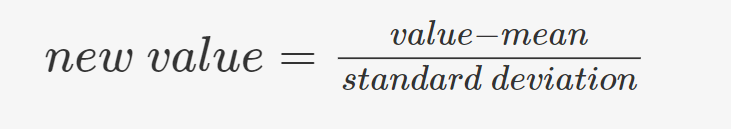

In [6]:
from sklearn.preprocessing import StandardScaler
std_wine = StandardScaler().fit_transform(wine_df) # normalizing the data 

- Sci-kit learn permet d'obtenir très facilement les principaux composants.

In [7]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(std_wine)

- Dans notre dernière expérience, nous supprimions les variables fortement corrélées. Avec l'ACP, cependant, nous essayons de calculer de nouvelles caractéristiques (composantes principales) qui compactent l'information dans certaines dimensions.

- Dans les coulisses, l'algorithme obtiendra d'abord la matrice de covariance de la même manière que nous l'avons fait précédemment. Ensuite, il calculera les Composantes Principales (PC). Si nos points de données ont 13 variables, nous obtiendrons 13 PC. Un PC est une combinaison linéaire des variables telles qu'elles n'ont aucune corrélation entre elles (elles sont orthogonales) et que la plupart des informations sont comprimées dans les premiers PC. Dans ce cas, "l'information" est la variance.

- Dans notre exemple, voici la variance capturée dans chaque composante principale :

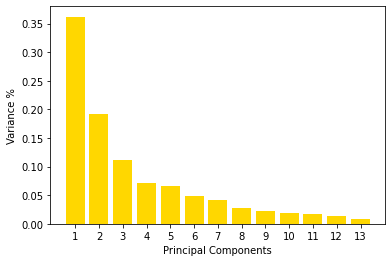

In [8]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

Comme on a  dit, la majeure partie de la variance est placée dans le premier composant. Ce qui reste est mis dans le composant 2, puis le composant 3, etc.

Pour expliquer comment cela fonctionne, regardons une image.

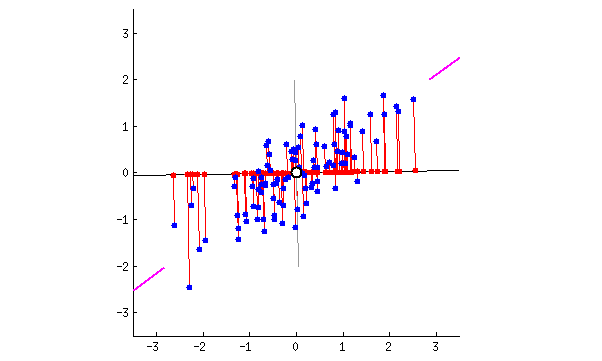

- Dans l'animation ci-dessus, les points de données sont 2d, il y aura donc 2 composants principaux. La ligne noire est la 1ère composante principale (PC1) et sa position correcte serait le long des deux marqueurs magenta. Considérez les projections de chaque point sur PC1 (les points rouges). Lorsque PC1 est dans la bonne position, les points rouges sont les plus éloignés les uns des autres. C'est ainsi que nous comprimons le plus de variance dans le PC - en maximisant la distance entre les points rouges.

- Ensuite, PC2 est affiché en gris. Il se trouve de la même manière, sauf qu'il est contraint d'être orthogonal à PC1. Cette contrainte garantit que les composants ne sont pas corrélés entre eux. De plus, il convient de noter que l'animation illustre également comment les premiers PC ont la variance la plus élevée.

- Maintenant que nous avons l'intuition, passons à l'implémentation. D'après le graphique de variance que ona a montré plus tôt, il n'y avait pas beaucoup de variance contenue dans le troisième composant, alors traçons simplement les 2 premiers.

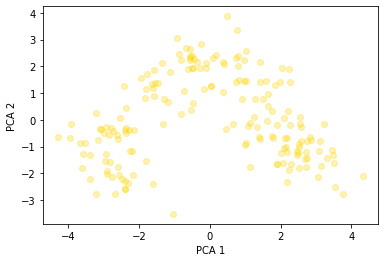

In [9]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

- Génial, PCA nous a aidé à réduire la dimension de nos données et nous avons pu faire ce joli tracé. Encore plus intéressant, c'est qu'il semble qu'il y ait 3 grappes de vin présentes.

## Regroupement — K-means

- Pour rendre les clusters plus apparents, utilisons l'algorithme de clustering K-means pour les coder en couleur. 
Nous devons d'abord déterminer combien de clusters nous voulons. Par inspection visuelle, nous penserons qu'il y en a 3, mais pour être complet, nous utiliserons l'inertie pour nous aider dans cette décision.


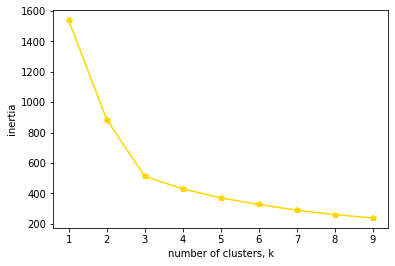

In [11]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

- En règle générale, nous examinons ce diagramme d'inertie pour trouver le point de coude. Dans notre cas, il semble que le coude se produise avec 3 clusters, nous allons donc continuer avec cela.

- Créons donc notre modèle final avec 3 clusters sur PC1 et PC2 :

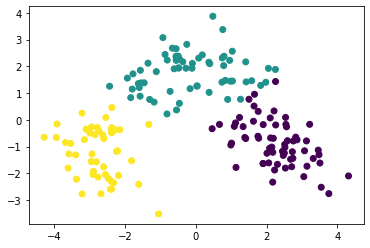

In [12]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

> The next step would be to determine the meaning of these clusters